# Query di BigQuery:



```
SELECT
  province_state,
  country_region,
  Bulanan,
  latitude,
  longitude,
  sum(confirmed) AS confirmed,
  sum(deaths) AS deaths,
  sum(CAST(recovered AS FLOAT64)) AS recovered,
  sum(active) AS active
FROM
  (SELECT
    *,
    LAST_DAY(date) AS Bulanan
  FROM
    bigquery-public-data.covid19_jhu_csse_eu.summary
  WHERE
    country_region IN ('Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines', 'Vietnam', 'Brunei', 'Burma', 'Cambodia', "Laos", "China")
  )
GROUP BY
  province_state, country_region, Bulanan, latitude, longitude
```



---




# i. Pendahuluan



## Latar Belakang

Corona Virus Disease 2019 atau disingkat menjadi COVID-19 merupakan penyakit menular yang pertama kali terdeteksi di Wuhan, Tingkok pada Desember 2019, dan mulai menyebar ke negara-negara yang ada diseluruh dunia. Penyebaran ini mengalami peningkatan yang signifikan yang memiliki dampak yang luas seperti pada bidang kesehatan, sosial, dan ekonomi. Meningkatnya jumlah kasus dan kematian menjadi perhatian yang serius bagi pemerintah dan masyarakat, dari penyebaran yang cepat melalui droplet yang dihasilkan dari batuk, bersin, ataupun ketika berbicara.

## Problem Statement

Perbandingan penangangan kasus COVID-19 pada negara Indonesia dibandingkan dengan negara-negara lainnya yang ada di Asia Pasific dan negara asal yaitu China dari bulan Maret 2020 hingga Agustus 2021

# ii. Pustaka

## Memasukkan library yang akan digunakan

Library yang digunakan adalah Pandas, dan perlu mengimport numpy dan matplotlib untuk keperluan selanjutnya

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iii. Data Loading

## Membaca dan menampilkan CSV yang akan dianalisis

In [39]:
df = pd.read_csv ('https://raw.githubusercontent.com/burjoawl/Burrs_Portofolio/main/Covid_Indonesia_Dibandingkan_Negara_Lain.csv')
df

,province_state,country_region,Bulanan,latitude,longitude,confirmed,deaths,recovered,active
0,Anhui,China,2020-05-31,31.8257,117.2264,30721,186.0,30535.0,0.0
1,Beijing,China,2020-05-31,40.1824,116.4142,18383,279.0,17709.0,395.0
2,Chongqing,China,2020-05-31,30.0572,107.8740,17949,186.0,17763.0,0.0
3,Fujian,China,2020-05-31,26.0789,117.9874,11048,31.0,10987.0,30.0
4,Gansu,China,2020-05-31,37.8099,101.0583,2363,34.0,2329.0,0.0
...,...,...,...,...,...,...,...,...,...
2005,Heilongjiang,China,2020-03-31,47.8620,127.7615,968,26.0,934.0,8.0
2006,Henan,China,2020-03-31,33.8820,113.6140,2549,44.0,2500.0,5.0
2007,Shanghai,China,2020-03-31,31.2020,121.4491,855,9.0,660.0,186.0
2008,Yunnan,China,2020-03-31,24.9740,101.4870,354,4.0,344.0,6.0


In [40]:
# Melihat jumlah data yang terdapat didalam csv

print('Jumlah data yang terdapat dalam file CSV adalah {} baris dan {} kolom'.format(df.shape[0], df.shape[1]))

Jumlah data yang terdapat dalam file CSV adalah 2010 baris dan 9 kolom


In [41]:
# Melihat 5 data teratas dengan fungsi head

print('Menampilkan 5 data teratas')
df.head(5)

Menampilkan 5 data teratas


,province_state,country_region,Bulanan,latitude,longitude,confirmed,deaths,recovered,active
0,Anhui,China,2020-05-31,31.8257,117.2264,30721,186.0,30535.0,0.0
1,Beijing,China,2020-05-31,40.1824,116.4142,18383,279.0,17709.0,395.0
2,Chongqing,China,2020-05-31,30.0572,107.8740,17949,186.0,17763.0,0.0
3,Fujian,China,2020-05-31,26.0789,117.9874,11048,31.0,10987.0,30.0
4,Gansu,China,2020-05-31,37.8099,101.0583,2363,34.0,2329.0,0.0


In [42]:
# Melihat 5 data terbawah dengan fungsi tail

print('Menampilkan 5 data terbawah')
df.tail(5)

Menampilkan 5 data terbawah


,province_state,country_region,Bulanan,latitude,longitude,confirmed,deaths,recovered,active
2005,Heilongjiang,China,2020-03-31,47.862,127.7615,968,26.0,934.0,8.0
2006,Henan,China,2020-03-31,33.882,113.6140,2549,44.0,2500.0,5.0
2007,Shanghai,China,2020-03-31,31.202,121.4491,855,9.0,660.0,186.0
2008,Yunnan,China,2020-03-31,24.974,101.4870,354,4.0,344.0,6.0
2009,NaN,Philippines,2020-01-31,NaN,NaN,2,NaN,NaN,NaN


In [43]:
# Melihat kolom dan data tipenya dengan fungsi info

print ('Melihatkan kolom dan data tipenya')
df.info()

Melihatkan kolom dan data tipenya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  1607 non-null   object 
 1   country_region  2010 non-null   object 
 2   Bulanan         2010 non-null   object 
 3   latitude        1953 non-null   float64
 4   longitude       1953 non-null   float64
 5   confirmed       2010 non-null   int64  
 6   deaths          2004 non-null   float64
 7   recovered       866 non-null    float64
 8   active          847 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 141.5+ KB


In [45]:
# Menampilkan grup berdasarkan country_region secara abjad dengan menampilkan nilai confirmed
# Menggunakan sum karena jumlah total yang terkena penyakit covid-19

df.groupby ('country_region', sort=True)["confirmed"].sum()

country_region
Brunei           80268410
Burma           374668250
Cambodia         79416154
China          1156480599
Indonesia      3692006391
Laos             92246613
Malaysia       2374175682
Philippines    2281723408
Singapore       723422944
Thailand       2098072604
Vietnam        4314591268
Name: confirmed, dtype: int64

# iv. Data Cleaning

## Menghilangkan kolom

Beberapa kolom dihilangkan dengan alasan tidak relevan seperti Province_state, latitude, longitude

In [9]:
df.drop(["province_state", "latitude", "longitude"], inplace=True, axis=1)
print (df.shape)

(2010, 6)


## Merubah nama kolom

Merubah nama kolom menjadi Bahasa Indonesia agar lebih mudah pembacaannya

In [10]:
df.rename(columns={'country_region': 'Negara', 'confirmed' : 'Kasus Terkonfirmasi', 'deaths': 'Meninggal', 'recovered': 'Sembuh', 'active':'Pasien'}, inplace=True)
df

,Negara,Bulanan,Kasus Terkonfirmasi,Meninggal,Sembuh,Pasien
0,China,2020-05-31,30721,186.0,30535.0,0.0
1,China,2020-05-31,18383,279.0,17709.0,395.0
2,China,2020-05-31,17949,186.0,17763.0,0.0
3,China,2020-05-31,11048,31.0,10987.0,30.0
4,China,2020-05-31,2363,34.0,2329.0,0.0
...,...,...,...,...,...,...
2005,China,2020-03-31,968,26.0,934.0,8.0
2006,China,2020-03-31,2549,44.0,2500.0,5.0
2007,China,2020-03-31,855,9.0,660.0,186.0
2008,China,2020-03-31,354,4.0,344.0,6.0


## Menyatukan Data China

Data China terbagi dalam provinsi-provinsi, disatukan karena yang akan dianalisis per negara

In [11]:
df_China = df.query("Negara == 'China'").groupby(['Negara', 'Bulanan'], as_index=False).sum()
df_China

,Negara,Bulanan,Kasus Terkonfirmasi,Meninggal,Sembuh,Pasien
0,China,2020-03-31,1710104,68270.0,1485437.0,41612.0
1,China,2020-04-30,2500143,118290.0,2333016.0,48837.0
2,China,2020-05-31,2605281,143763.0,2454360.0,7158.0
3,China,2020-06-30,2532679,139165.0,2384997.0,8517.0
4,China,2020-07-31,2653847,144025.0,2481868.0,27954.0
5,China,2020-08-31,2764441,145664.0,2573031.0,45746.0
6,China,2020-09-30,2707451,142035.0,2553294.0,12122.0
7,China,2020-10-31,2818977,146909.0,2659413.0,12655.0
8,China,2020-11-30,2758806,142247.0,2597861.0,18698.0
9,China,2020-12-31,2931959,147516.0,2739565.0,44878.0


## Menghilangkan data null

Dataset yang teredia, memiliki kekosongan data pada kolom Meninggal dan Sembuh per bulan Agustus 2021, sehingga data setelah bulan Agustus 2020 dihilangkan

In [12]:
df.dropna(subset=['Sembuh', 'Pasien'], inplace=True)
df

,Negara,Bulanan,Kasus Terkonfirmasi,Meninggal,Sembuh,Pasien
0,China,2020-05-31,30721,186.0,30535.0,0.0
1,China,2020-05-31,18383,279.0,17709.0,395.0
2,China,2020-05-31,17949,186.0,17763.0,0.0
3,China,2020-05-31,11048,31.0,10987.0,30.0
4,China,2020-05-31,2363,34.0,2329.0,0.0
...,...,...,...,...,...,...
1997,Laos,2020-03-31,24,0.0,0.0,24.0
2005,China,2020-03-31,968,26.0,934.0,8.0
2006,China,2020-03-31,2549,44.0,2500.0,5.0
2007,China,2020-03-31,855,9.0,660.0,186.0


In [13]:
df_China = df_China[(df_China['Sembuh'] != 0) & (df_China['Pasien'] != 0)]
df_China

,Negara,Bulanan,Kasus Terkonfirmasi,Meninggal,Sembuh,Pasien
0,China,2020-03-31,1710104,68270.0,1485437.0,41612.0
1,China,2020-04-30,2500143,118290.0,2333016.0,48837.0
2,China,2020-05-31,2605281,143763.0,2454360.0,7158.0
3,China,2020-06-30,2532679,139165.0,2384997.0,8517.0
4,China,2020-07-31,2653847,144025.0,2481868.0,27954.0
5,China,2020-08-31,2764441,145664.0,2573031.0,45746.0
6,China,2020-09-30,2707451,142035.0,2553294.0,12122.0
7,China,2020-10-31,2818977,146909.0,2659413.0,12655.0
8,China,2020-11-30,2758806,142247.0,2597861.0,18698.0
9,China,2020-12-31,2931959,147516.0,2739565.0,44878.0


## Mengubah urutan kolom agar terlihat rapih


In [14]:
df=df[['Negara', 'Bulanan', 'Pasien', 'Sembuh', 'Meninggal', 'Kasus Terkonfirmasi']]
df

,Negara,Bulanan,Pasien,Sembuh,Meninggal,Kasus Terkonfirmasi
0,China,2020-05-31,0.0,30535.0,186.0,30721
1,China,2020-05-31,395.0,17709.0,279.0,18383
2,China,2020-05-31,0.0,17763.0,186.0,17949
3,China,2020-05-31,30.0,10987.0,31.0,11048
4,China,2020-05-31,0.0,2329.0,34.0,2363
...,...,...,...,...,...,...
1997,Laos,2020-03-31,24.0,0.0,0.0,24
2005,China,2020-03-31,8.0,934.0,26.0,968
2006,China,2020-03-31,5.0,2500.0,44.0,2549
2007,China,2020-03-31,186.0,660.0,9.0,855


# v. Eksplorasi Data

## Data Query

### Data Query 1

Menjelaskan nilai maksimal 'Meninggal' disetiap Negara setiap bulannya, dilihat dari urutan meninggal terbanyak dari Indonesia dan yang paling sedikit yaitu Brunei

In [15]:
df_Query1 = df.groupby('Negara')['Meninggal'].max().reset_index().sort_values('Meninggal', ascending=False)

print(df_Query1)

         Negara  Meninggal
4     Indonesia  3638566.0
7   Philippines   817272.0
6      Malaysia   697932.0
1         Burma   407116.0
9      Thailand   248619.0
3         China   139872.0
2      Cambodia    52331.0
10      Vietnam    19393.0
8     Singapore     1419.0
5          Laos      129.0
0        Brunei      122.0


### Data Query 2

Menjelaskan nilai 'Sembuh' dan juga 'Meninggal' yang lebih besar sama dengan 1.000.000, terlihat hanya negara Indonesia yang terjadi dari bulan Maret 2021 hingga Agustus 2021

In [16]:
df_Query2 = df.query("Sembuh >= 1000000 and Meninggal >= 1000000").sort_values('Bulanan')

print(df_Query2)

         Negara     Bulanan      Pasien      Sembuh  Meninggal  \
1558  Indonesia  2021-03-31   4206546.0  38936831.0  1200707.0   
1603  Indonesia  2021-04-30   3230159.0  43234562.0  1296529.0   
267   Indonesia  2021-05-31   2946922.0  49599831.0  1492339.0   
991   Indonesia  2021-06-30   4005121.0  53049090.0  1616313.0   
1799  Indonesia  2021-07-31  14086185.0  69710649.0  2268677.0   
414   Indonesia  2021-08-31   2106452.0  11433472.0  3638566.0   

      Kasus Terkonfirmasi  
1558             44344084  
1603             47761250  
267              54051659  
991              58774875  
1799             86065511  
414             118769332  


### Data Query 3

Menjelaskan bahwa kolom yang diambil dari indeks 830 hingga 840, terlihat data dari negara Laos, Malaysia, Philippines, dan Vietnam

In [17]:
df_Query3 = df[830:840]

print (df_Query3)

           Negara     Bulanan    Pasien   Sembuh  Meninggal  \
1980         Laos  2020-04-30      85.0      4.0        0.0   
1981     Malaysia  2020-04-30   14017.0  11330.0      422.0   
1982  Philippines  2020-04-30   23398.0   1466.0     1517.0   
1983      Vietnam  2020-04-30     709.0    807.0        0.0   
1984         Laos  2020-05-31      77.0    189.0        0.0   
1985     Malaysia  2020-05-31   18976.0  77756.0     1570.0   
1986  Philippines  2020-05-31  129168.0  37547.0    11307.0   
1987      Vietnam  2020-05-31     702.0   3628.0        0.0   
1988        China  2021-02-28     -34.0     36.0        0.0   
1994     Malaysia  2020-03-31    7287.0   1326.0      109.0   

      Kasus Terkonfirmasi  
1980                   89  
1981                25769  
1982                26381  
1983                 1516  
1984                  266  
1985                98302  
1986               178022  
1987                 4330  
1988                    1  
1994                 8722 

## Grouping

### Data Group 1

Menjelaskan nilai jumlah, rata-rata, dan maksimal dari nilai 'Kasus Terkonfirmasi' dari semua Negara yang ada

In [18]:
df_Group1 = df.groupby('Negara')['Kasus Terkonfirmasi'].agg(['sum', 'mean', 'max'])

print (df_Group1)

                   sum          mean        max
Negara                                         
Brunei          123561  6.864500e+03      35286
Burma         50311220  2.795068e+06   10985696
Cambodia       6897512  3.831951e+05    2662445
China         50707907  8.074507e+04    2116257
Indonesia    532416724  2.957871e+07  118769332
Laos            292775  1.272935e+04     110312
Malaysia     132184965  3.147261e+06   28104044
Philippines  266205525  1.157415e+07   46488506
Singapore     27483428  1.526857e+06    2053482
Thailand      54541712  3.030095e+06   28523465
Vietnam        4333725  1.884228e+05    1875813


### Data Group 2
Menjelaskan nilai rata-rata dari 'Sembuh' tiap bulannya

In [19]:
df_Group2 = df.groupby('Bulanan')['Sembuh'].mean()

print (df_Group2)

Bulanan
2020-03-31    2.921769e+04
2020-04-30    4.941775e+04
2020-05-31    6.050372e+04
2020-06-30    8.438541e+04
2020-07-31    1.194805e+05
2020-08-31    2.204464e+05
2020-09-30    3.610610e+05
2020-10-31    5.425257e+05
2020-11-30    7.006976e+05
2020-12-31    9.079999e+05
2021-01-31    1.150934e+06
2021-02-28    1.309343e+06
2021-03-31    1.721024e+06
2021-04-30    1.956193e+06
2021-05-31    2.414381e+06
2021-06-30    2.708123e+06
2021-07-31    3.436572e+06
2021-08-31    5.319966e+05
2021-09-30    1.445000e+03
Name: Sembuh, dtype: float64


### Data Group 3
Menjelaskan nilai maksimal dari 'Meninggal' pada tiap negara yang ada

In [20]:
df_Group3 = df.groupby('Negara')['Meninggal'].max()

print (df_Group3)

Negara
Brunei             122.0
Burma           407116.0
Cambodia         52331.0
China           139872.0
Indonesia      3638566.0
Laos               129.0
Malaysia        697932.0
Philippines     817272.0
Singapore         1419.0
Thailand        248619.0
Vietnam          19393.0
Name: Meninggal, dtype: float64


## Visualisasi

Membuat visualisasi menggunakan scatter, plot, dan bar

### Grafik Scatter

Menjelaskan perbandingan angka 'Meninggal' dan 'Sembuh' di Indonesia dengan negara ASEAN lainnya, terlihat negara Indonesia memiliki perbandingan yang paling tinggi daripada negara lainnya, dan terdapat angka meninggal yang sangat tinggi dibandingan dengan angak kesembuhan

Text(0, 0.5, 'Meninggal (Jutaan)')

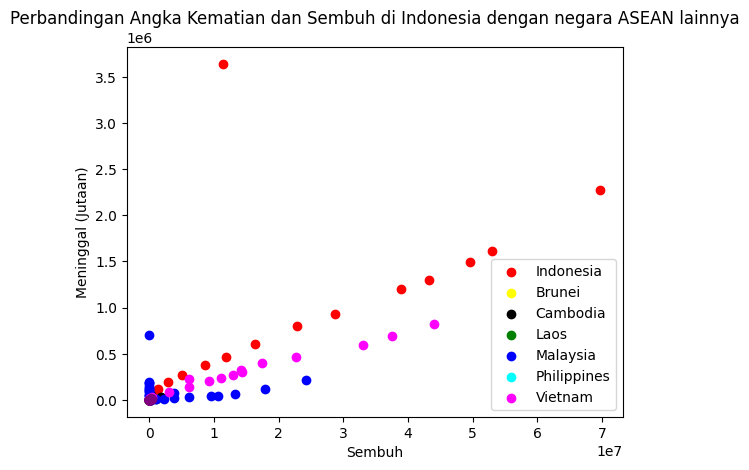

In [21]:
plt.scatter(x=df[df['Negara'] == 'Indonesia'].Sembuh, y=df[df['Negara'] == 'Indonesia'].Meninggal, color = 'Red')
plt.scatter(x=df[df['Negara'] == 'Brunei'].Sembuh, y=df[df['Negara'] == 'Brunei'].Meninggal, color = 'Yellow')
plt.scatter(x=df[df['Negara'] == 'Cambodia'].Sembuh, y=df[df['Negara'] == 'Cambodia'].Meninggal, color = 'Black')
plt.scatter(x=df[df['Negara'] == 'Laos'].Sembuh, y=df[df['Negara'] == 'Laos'].Meninggal, color = 'Green')
plt.scatter(x=df[df['Negara'] == 'Malaysia'].Sembuh, y=df[df['Negara'] == 'Malaysia'].Meninggal, color = 'Blue')
plt.scatter(x=df[df['Negara'] == 'Myanmar'].Sembuh, y=df[df['Negara'] == 'Myanmar'].Meninggal, color = 'Cyan')
plt.scatter(x=df[df['Negara'] == 'Philippines'].Sembuh, y=df[df['Negara'] == 'Philippines'].Meninggal, color = 'Magenta')
plt.scatter(x=df[df['Negara'] == 'Vietnam'].Sembuh, y=df[df['Negara'] == 'Vietnam'].Meninggal, color = 'Purple')

plt.title('Perbandingan Angka Kematian dan Sembuh di Indonesia dengan negara ASEAN lainnya');
labels = ['Indonesia', 'Brunei', 'Cambodia', 'Laos', 'Malaysia', 'Philippines','Vietnam']
plt.legend(labels, loc="best")
plt.xlabel('Sembuh')
plt.ylabel('Meninggal (Jutaan)')

### Grafik Plot
Menjelaskan perbandingan 'Pasien' per 'Bulanan' antara negara Indonesia dengan China, terlihat bahwa Indonesia memiliki angka yang lebih tinggi daripada China

<ipython-input-22-44838784fa39>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indo = df[df["Negara"] == "Indonesia"].groupby("Bulanan", as_index=False).sum()


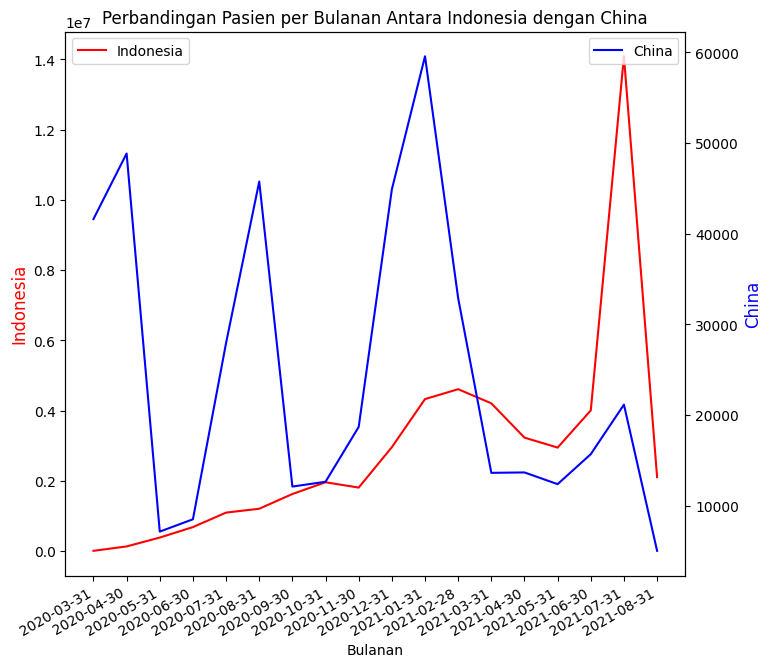

In [22]:
df_indo = df[df["Negara"] == "Indonesia"].groupby("Bulanan", as_index=False).sum()

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(df_indo.Bulanan, df_indo["Pasien"], color='red')
ax2.plot(df_China.Bulanan, df_China["Pasien"], color='blue')

ax1.set_ylabel('Indonesia', color='red', fontsize=12)
ax2.set_ylabel('China', color='blue', fontsize=12)
ax1.set_xlabel('Bulanan')

plt.title("Perbandingan Pasien per Bulanan Antara Indonesia dengan China")
ax1.legend(['Indonesia'])
ax2.legend(['China'])
fig.autofmt_xdate()


plt.show()

### Grafik Bar
Menjelaskan total 'Kasus Terkonfirmasi' negara ASEAN dan China, terlihat negara indonesia memiliki kasus terbanyak, diikuti oleh negara Philippines, dan kasus yang paling sedikit dimiliki oleh negara Laos dan Brunei

Text(0.5, 0, 'Kasus (Ratusan Juta)')

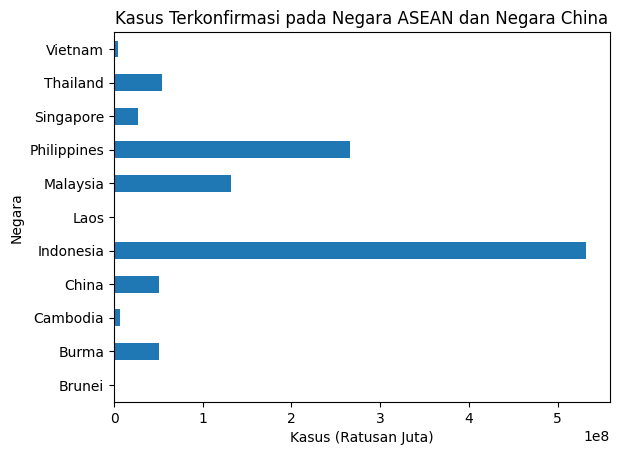

In [23]:
df.groupby("Negara")["Kasus Terkonfirmasi"].sum().plot(kind='barh')
plt.title("Kasus Terkonfirmasi pada Negara ASEAN dan Negara China")
plt.ylabel("Negara")
plt.xlabel("Kasus (Ratusan Juta)")


### Grafik Pie

Menjelaskan angka rata-rata 'Sembuh; per Negara termasuk negara China, terlihat rata-rata Indonesia lebih dominan dibandingkan negara lainnya

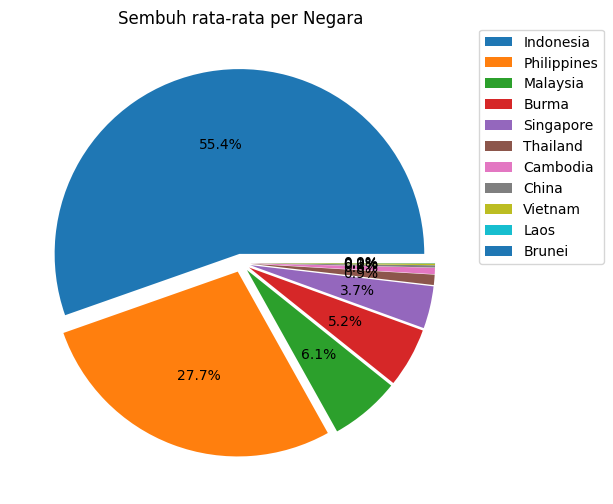

In [24]:
df_pie = df.groupby('Negara')['Sembuh'].mean().sort_values(ascending = False)
df_pie.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', legend=True, labeldistance=None, explode=[0.05, 0.05,0.05, 0.05,0.05, 0.05,0.05, 0.05,0.05, 0.05,0.05]).legend(bbox_to_anchor=(1, 1.02), loc='best')
plt.title('Sembuh rata-rata per Negara')
plt.ylabel('')
plt.show()

# vi. Kesimpulan

Dari data Grafik yang ada sebelumnya, singkatnya adalah
*   Indonesia memiliki perbandingan angka kematian dan sembuh paling banyak dibandingkan negara ASEAN lainnya
*   Dibandingkan dengan negara asal COVID-19 yaitu China, Indonesia jauh lebih banyak pasien per bulanan, dan adanya kenaikan pesat angka pasien pada saat bulan Juli 2021
*   Indonesia memiliki angka kasus COVID-19 terbanyak dibandingkan pada negara ASEAN dan negara asal yaitu China
*   Meskipun Indonesia memiliki angka kasus terbanyak, angka rata-rata sembuhnya juga memiliki angka yang tinggi

Sehingga dapat ditarik kesimpulan bahwa, Indonesia menangangi lebih baik dibandingkan dengan negara lain di ASEAN dan negara asal yaitu China




Perbandingan penangangan kasus COVID-19 pada negara Indonesia dibandingkan dengan negara-negara lainnya yang ada di Asia Pasific dan negara asal yaitu China dari bulan Maret 2020 hingga Agustus 2021
